In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [6]:
array_data = np.array([[1,2],[1,4],[1,8],[10,4],[10,12],[10,13]])


In [8]:
array_data

array([[ 1,  2],
       [ 1,  4],
       [ 1,  8],
       [10,  4],
       [10, 12],
       [10, 13]])

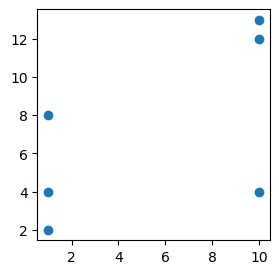

In [18]:
plt.figure(figsize=(3,3))
plt.scatter(array_data[:,0],array_data[:,1])

In [20]:
Kmeans = KMeans(n_clusters=2,random_state =42)
Kmeans.fit(array_data)

KMeans(n_clusters=2, random_state=42)

In [28]:
Predict  = Kmeans.predict(array_data)

In [30]:
Predict

array([1, 1, 1, 0, 0, 0])

In [32]:
df = pd.DataFrame(array_data)

In [36]:
df_y = pd.DataFrame(Predict)

In [38]:
df_y

,0
0,1
1,1
2,1
3,0
4,0
5,0


In [40]:
df['predict'] = df_y

In [50]:
df.columns = ['x1','x2','predict']
df

,x1,x2,predict
0,1,2,1
1,1,4,1
2,1,8,1
3,10,4,0
4,10,12,0
5,10,13,0


In [64]:
for i in range (1,6) :
    kmeans = KMeans(n_clusters= i , random_state = 42 )
    kmeans.fit(array_data)
    print('K -->',i)
    print(kmeans.cluster_centers_)
    print('*'*20)

K --> 1
[[5.5        7.16666667]]
********************
K --> 2
[[10.          9.66666667]
 [ 1.          4.66666667]]
********************
K --> 3
[[10.         12.5       ]
 [ 1.          4.66666667]
 [10.          4.        ]]
********************
K --> 4
[[10.   4. ]
 [ 1.   8. ]
 [ 1.   3. ]
 [10.  12.5]]
********************
K --> 5
[[10.   4. ]
 [ 1.   8. ]
 [ 1.   2. ]
 [10.  12.5]
 [ 1.   4. ]]
********************


In [109]:
res = []
for i in range(1,6):
    kmeans = KMeans(n_clusters = i, random_state=42, init='k-means++')
    kmeans.fit(array_data)
    res.append(kmeans.inertia_)

In [111]:
#kmeans.inertia_
#sum of square of the distance b/w data points and their respective cluster centroids
res

[226.33333333333334, 67.33333333333333, 19.166666666666664, 2.5, 0.5]

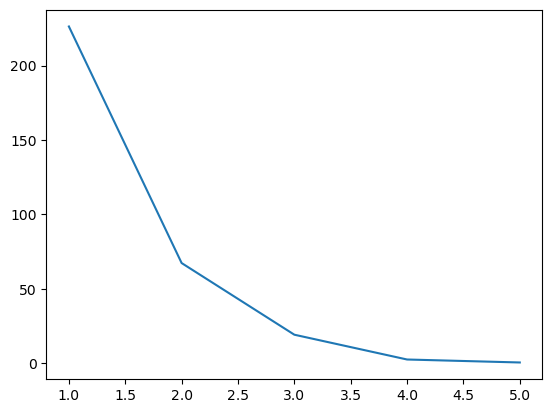

In [115]:
plt.plot(range(1,6) , res)

In [121]:
# K =2
kmeans_final = KMeans(n_clusters= 2 , random_state = 42)
kmeans_final.fit(array_data)
pred_final = kmeans_final.predict(array_data)
df['pred_cluster_2'] = pred_final
df

,x1,x2,predict,pred_cluster_2
0,1,2,1,1
1,1,4,1,1
2,1,8,1,1
3,10,4,0,0
4,10,12,0,0
5,10,13,0,0
